# Installing libraries

In [1]:
!pip install geopandas

     |████████████████████████████████| 901kB 688kB/s eta 0:00:01
     |████████████████████████████████| 24.6MB 892kB/s eta 0:00:01     |████████████████████████▋       | 18.9MB 2.1MB/s eta 0:00:03
     |████████████████████████████████| 12.9MB 5.4MB/s eta 0:00:01
     |████████████████████████████████| 1.6MB 10.7MB/s eta 0:00:01
  Created wheel for munch: filename=munch-2.3.2-py2.py3-none-any.whl size=5793 sha256=dfeefbd7358f6a0ca7d4294490ee033ab038474ab238d7f3d9b5e49982db7e8f
  Stored in directory: /Users/jananiravi/Library/Caches/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [2]:
!pip install descartes

# Introduction to geospatial vector data in python

#### Geospatial [Data](http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/) , or spatial data (as it's sometimes known), is information that has a geographic aspect to it. In other words, the records in this type of information set have coordinates, an address, city, postal code, or zip code included with them. The most obvious example is a road map. We see the rendered result, but the features on the map are stored with this type of information included in them.

There are two basic types or forms of geospatial data:

* Vector - This form uses points, lines, and polygons to represent spatial features such as cities, roads, and streams.

* Raster - This form uses cells (computers often use dots or pixels) to represent spatial features. Cities are single cells, roads are linear sequences of cells, and streams are collections of adjacent cells. An example of this is remote satellite data.

### Import libraries

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import geopandas

pd.options.display.max_rows = 10

In [15]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

df.head()

,City,Country,Latitude,Longitude
0,Buenos Aires,Argentina,-34.58,-58.66
1,Brasilia,Brazil,-15.78,-47.91
2,Santiago,Chile,-33.45,-70.66
3,Bogota,Colombia,4.60,-74.08
4,Caracas,Venezuela,10.48,-66.86


In [16]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

In [17]:
gdf.head()

,City,Country,Latitude,Longitude,geometry
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66 -34.58)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91 -15.78)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66 -33.45)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08 4.6)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86 10.48)


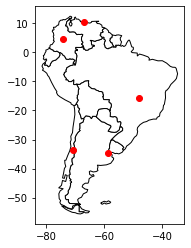

In [18]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

gdf.plot(ax=ax, color='red')

plt.show()

# Importing geospatial data

In [19]:
countries = geopandas.read_file('datasets/data/ne_110m_admin_0_countries.shp')

In [20]:
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Fiji,斐濟,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,POLYGON ((33.90371119710453 -0.950000000000000...
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,...,서사하라,Westelijke Sahara,Sahara Zachodnia,Saara Ocidental,Западная Сахара,Västsahara,Batı Sahra,Tây Sahara,西撒哈拉,POLYGON ((-8.665589565454809 27.65642588959236...
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,...,캐나다,Canada,Kanada,Canadá,Канада,Kanada,Kanada,Canada,加拿大,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,United States of America,USA,...,미국,Verenigde Staten van Amerika,Stany Zjednoczone,Estados Unidos,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


### Data type of geospatial data

In [21]:
type(countries)

geopandas.geodataframe.GeoDataFrame

### Plot countries polygon
GeoDataFrame objects include a plot method

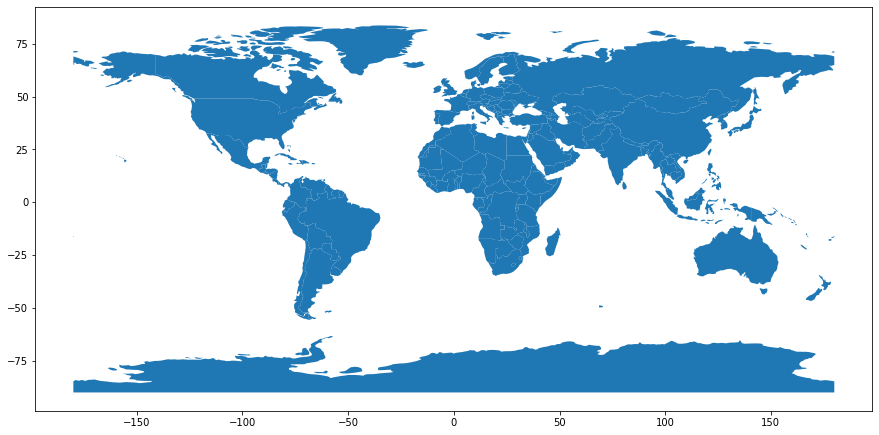

In [22]:
countries.plot(figsize=(15, 8))

plt.show()

### This is geometry of geospatial data
Each country is a polygon in the map

In [23]:
countries['geometry']

0      (POLYGON ((180 -16.06713266364245, 180 -16.555...
1      POLYGON ((33.90371119710453 -0.950000000000000...
2      POLYGON ((-8.665589565454809 27.65642588959236...
3      (POLYGON ((-122.84 49.00000000000011, -122.974...
4      (POLYGON ((-122.84 49.00000000000011, -120 49....
                             ...                        
172    POLYGON ((18.82982479287395 45.90887235802528,...
173    POLYGON ((20.07070000000004 42.58863000000008,...
174    POLYGON ((20.59024654668023 41.85540891928363,...
175    POLYGON ((-61.68000000000001 10.76, -61.105 10...
176    POLYGON ((30.83385242171543 3.509171604222463,...
Name: geometry, Length: 177, dtype: object

#### View the geometry of Tanzania
It's quite a complex polygon

In [24]:
print(countries.geometry[1])

POLYGON ((33.90371119710453 -0.9500000000000001, 34.07261999999997 -1.059819999999945, 37.69868999999994 -3.096989999999948, 37.7669 -3.67712, 39.20222 -4.67677, 38.74053999999995 -5.908949999999948, 38.79977000000008 -6.475660000000005, 39.44 -6.839999999999861, 39.47000000000014 -7.099999999999966, 39.19468999999998 -7.703899999999976, 39.25203000000005 -8.007809999999949, 39.18652000000009 -8.48550999999992, 39.53574000000009 -9.112369999999885, 39.94960000000003 -10.09840000000003, 40.31658622911085 -10.31709775281749, 40.31659000000002 -10.31709999999987, 39.52099999999996 -10.89688000000001, 38.42755659358775 -11.28520232508166, 37.82763999999997 -11.26878999999991, 37.47128999999995 -11.56876, 36.77515099462281 -11.59453744878081, 36.51408165868426 -11.72093800216673, 35.31239790216904 -11.43914641687915, 34.55998904799935 -11.52002003341592, 34.27999999999997 -10.16000000000003, 33.94083772409653 -9.693673841980285, 33.73972000000009 -9.417149999999992, 32.75937544122132 -9.230

### This is geometric area
The first country at index 0 is Fiji (which is tiny). The countries at index 3 and 4 are Canada and the USA.

In [25]:
countries['geometry'].area

0         1.639511
1        76.301964
2         8.603984
3      1712.995228
4      1122.281921
          ...     
172       8.604719
173       1.479321
174       1.231641
175       0.639000
176      51.196106
Length: 177, dtype: float64

### Look the names of columns

In [26]:
countries.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_

### This is average population number over all countries

__Note:-  The columns `POP_EST` contains records of population of each country__

In [27]:
countries[['NAME_EN', 'POP_EST', 'INCOME_GRP']].head()

,NAME_EN,POP_EST,INCOME_GRP
0,Fiji,920938,4. Lower middle income
1,Tanzania,53950935,5. Low income
2,Western Sahara,603253,5. Low income
3,Canada,35623680,1. High income: OECD
4,United States of America,326625791,1. High income: OECD


### Take Asia's polygon geometry and view

In [28]:
asia = countries[countries['CONTINENT'] == 'Asia']

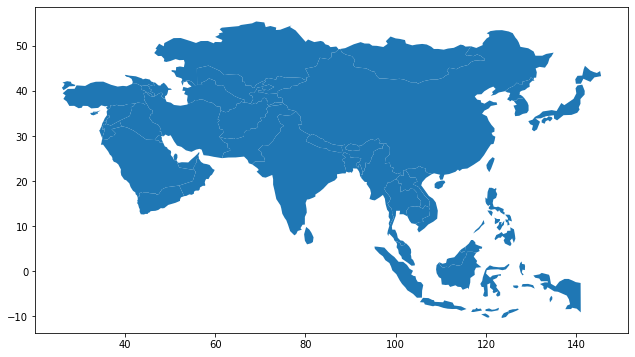

In [29]:
asia.plot(figsize=(12, 6))
plt.show()

## Geometries: Points, Linestrings, and Polygons
__Spatial vector data can consist of different types and three fundamental types are:-__
* __Point__ data: represents a single point in space 
* __Line__ data(LineString data): represents a sequence of points that form of line
* __Polygon__ data: represents a filled area

### Let's import some other datasets with different types of geometric objects

A [datasets](http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-populated-places/) about cities in the world

### Load and read geospatial data of cities

In [30]:
cities = geopandas.read_file('zip://datasets/ne_110m_populated_places.zip')

In [31]:
type(cities)

geopandas.geodataframe.GeoDataFrame

### View 10 sample

In [32]:
cities.tail(10)

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,...,name_ja,name_ko,name_nl,name_pl,name_sv,name_tr,name_vi,wdid_score,ne_id,geometry
233,0,600,2,Admin-0 capital,Tokyo,None,None,0,Tokyo,1.0,...,東京都,도쿄도,Tokio,Tokio,Tokyo prefektur,Tokyo,Tokyo,4,1159151609,POINT (139.7494615705447 35.68696276437117)
234,0,600,1,Admin-1 capital,Mumbai,Bombay,None,0,Mumbai,0.0,...,ムンバイ,뭄바이,Bombay,Mumbaj,Bombay,Mumbai,Mumbai,4,1159151611,POINT (72.85504343876647 19.0189362343566)
235,0,600,3,Admin-0 capital,Paris,None,None,0,Paris,1.0,...,パリ,파리,Parijs,Paryż,Paris,Paris,Paris,4,1159151613,POINT (2.33138946713035 48.86863878981461)
236,0,600,3,Admin-0 capital,Santiago,None,None,0,Santiago,1.0,...,サンティアゴ,산티아고,Santiago,Santiago,Santiago de Chile,Santiago,Santiago de Chile,4,1159151615,POINT (-70.66898671317483 -33.4480679569341)
237,0,600,1,Admin-1 capital,Kolkata,Calcutta,None,0,Kolkata,0.0,...,コルカタ,콜카타,Calcutta,Kolkata,Calcutta,Kalküta,Kolkata,4,1159151617,POINT (88.32272979950551 22.49691515689642)
238,0,600,1,Admin-1 capital,Rio de Janeiro,None,None,0,Rio de Janeiro,0.0,...,リオデジャネイロ,리우데자네이루,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,4,1159151619,POINT (-43.22696665284366 -22.92307731561596)
239,0,600,1,Admin-1 capital,São Paulo,None,Sao Paulo|Sio Paulo,0,Sao Paulo,0.0,...,サンパウロ,상파울루,São Paulo,São Paulo,São Paulo,São Paulo,São Paulo,4,1159151621,POINT (-46.62696583905523 -23.55673372837896)
240,0,600,3,Admin-1 capital,Sydney,None,None,0,Sydney,0.0,...,シドニー,시드니,Sydney,Sydney,Sydney,Sidney,Sydney,4,1159151623,POINT (151.1832339501475 -33.91806510862875)
241,0,600,0,Admin-0 capital,Singapore,None,None,0,Singapore,1.0,...,シンガポール,싱가포르,Singapore,Singapur,Singapore,Singapur,Singapore,4,1159151627,POINT (103.853874819099 1.294979325105942)
242,0,600,0,Admin-0 region capital,Hong Kong,None,None,0,Hong Kong,0.0,...,香港,홍콩,Hongkong,Hongkong,Hongkong,Hong Kong,Hồng Kông,4,1159151629,POINT (114.183063458463 22.30692675357551)


### View coordinate of one city
Where is Vatican City on this map?

In [33]:
print(cities['geometry'][0])

POINT (12.45338654497177 41.90328217996012)


#### Location of Singapore

In [34]:
print(cities['geometry'][241])

POINT (103.853874819099 1.294979325105942)


In [35]:
two_cities = cities.iloc[[0, 241]]

two_cities

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,...,name_ja,name_ko,name_nl,name_pl,name_sv,name_tr,name_vi,wdid_score,ne_id,geometry
0,8,10,3,Admin-0 capital,Vatican City,None,None,0,Vatican City,1.0,...,バチカン,바티칸 시국,Vaticaanstad,Watykan,Vatikanstaten,Vatikan,Thành Vatican,4,1159127243,POINT (12.45338654497177 41.90328217996012)
241,0,600,0,Admin-0 capital,Singapore,None,None,0,Singapore,1.0,...,シンガポール,싱가포르,Singapore,Singapur,Singapore,Singapur,Singapore,4,1159151627,POINT (103.853874819099 1.294979325105942)


#### Plotting the cities
This is meaningless without a map

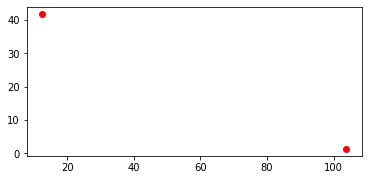

In [39]:
two_cities.plot(color = 'r')

plt.show()

#### Plotting the cities on a world map
The plot method returns an axis object which can be used to plot the cities

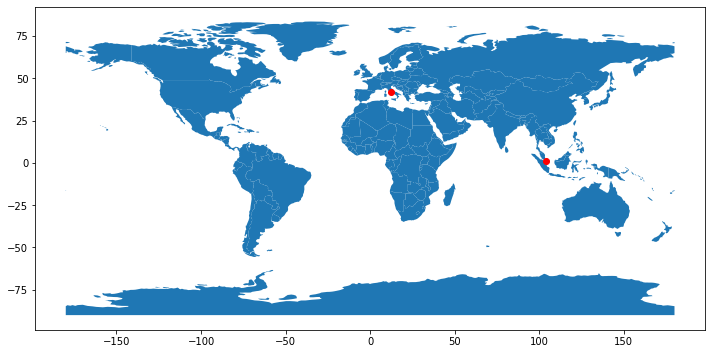

In [40]:
ax = countries.plot(figsize=(12, 6))

two_cities.plot(ax = ax, color = 'r')

plt.show()

__A [Datasets](http://www.naturalearthdata.com/downloads/50m-physical-vectors/50m-rivers-lake-centerlines/) about rivers in the world__

### Load and read another geospatial data of rivers

In [53]:
rivers = geopandas.read_file('zip://datasets/ne_50m_rivers_lake_centerlines.zip')

In [54]:
rivers.head()

,scalerank,featurecla,name,note,min_zoom,name_alt,min_label,name_en,label,wikidataid,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,6,Lake Centerline,Kama,None,5.0,None,6.0,Kama,Kama,Q79082,...,Kama,Rio Kama,Кама,Kama,None,Sông Kama,卡馬河,4,1159125905,LINESTRING (51.9371337598152 55.70106609892139...
1,6,River,Kama,None,5.0,None,6.0,Kama,Kama,Q79082,...,Kama,Rio Kama,Кама,Kama,None,Sông Kama,卡馬河,4,1159125917,LINESTRING (53.69384765584471 58.2063174502901...
2,3,Lake Centerline,Abay,None,3.0,None,4.0,Lesser Abay,None,Q3501984,...,None,Rio Lesser Abay,None,Lesser Abay,None,None,None,2,1159125319,LINESTRING (37.11301150887408 11.8549872909308...
3,3,Lake Centerline,Al Furat,None,3.0,None,4.0,Euphrates,Al Furat,Q34589,...,Eufrat,Rio Eufrates,Евфрат,Eufrat,Fırat,Euphrates,幼发拉底河,5,1159125935,LINESTRING (38.56119184742585 35.8626433379197...
4,6,Lake Centerline,Alabama,None,5.0,None,6.0,Alabama,Alabama,Q558643,...,Alabama,Rio Alabama,Алабама,None,None,Sông Alabama,阿拉巴馬河,4,1159114961,(LINESTRING (-86.52176754393696 33.03211843501...


### View, coordinates of one river

In [55]:
print(rivers['geometry'][0])

LINESTRING (51.9371337598152 55.70106609892139, 51.88086646731369 55.68625891701544, 51.82031249962222 55.69745514553858, 51.7476018274624 55.69366250841807, 51.6628417966117 55.60817291874525, 51.57871093775964 55.59943268477065, 51.51342773400279 55.58312409100404, 51.50854492161091 55.52948639548083, 51.48583984403365 55.49640534033426, 51.36914062543957 55.46796295772435, 51.21306254869774 55.50264985760492, 51.13452148447897 55.48273346527725, 51.07934570274205 55.46759674659262, 50.98022460947817 55.46637604371949, 50.83445217522774 55.45630956063775, 50.6883789060617 55.42011139502489, 50.4118652342932 55.40119049644431, 50.07802734358711 55.38112213757665, 49.82216796867687 55.33466217681809, 49.53222656260584 55.260614325191, 49.38232421848795 55.17182037990665, 49.24808475131027 55.11301870345045)


## Plotting our different layers

### Plot countries map
We focus on the central parts of the world. We don't shade the countries either

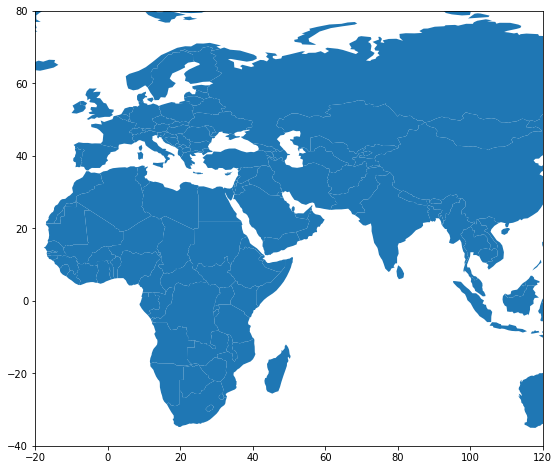

In [65]:
ax = countries.plot(figsize=(15, 8))

ax.set(xlim=(-20, 120), ylim=(-40, 80))

plt.show()

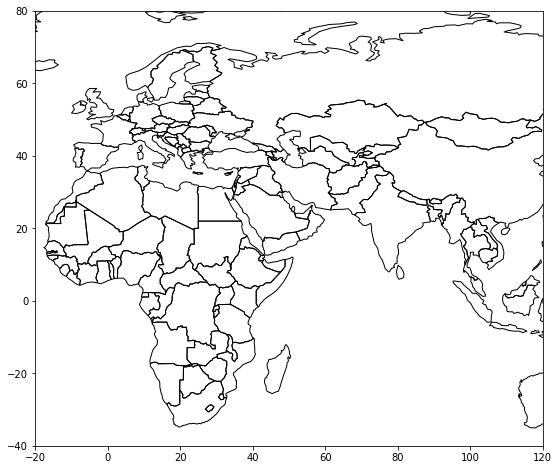

In [66]:
ax = countries.plot(edgecolor = 'k', 
                    facecolor='none', 
                    figsize=(15, 8))

ax.set(xlim=(-20, 120), ylim=(-40, 80))

plt.show()

## Plotting rivers on map 

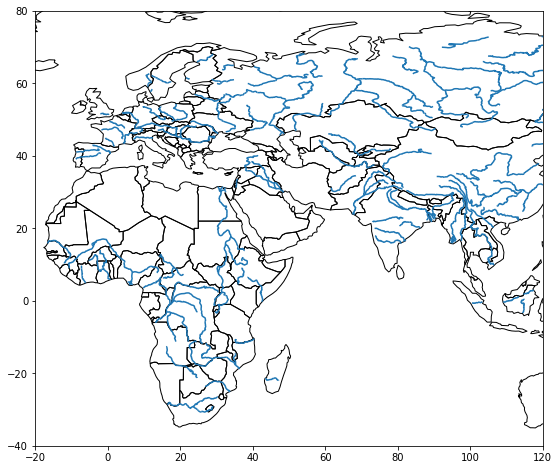

In [67]:
ax = countries.plot(edgecolor = 'k', 
                    facecolor='none', 
                    figsize=(15, 8))

rivers.plot(ax=ax)
ax.set(xlim=(-20, 120), ylim=(-40, 80))

plt.show()

## Plottting rivers as well as cities

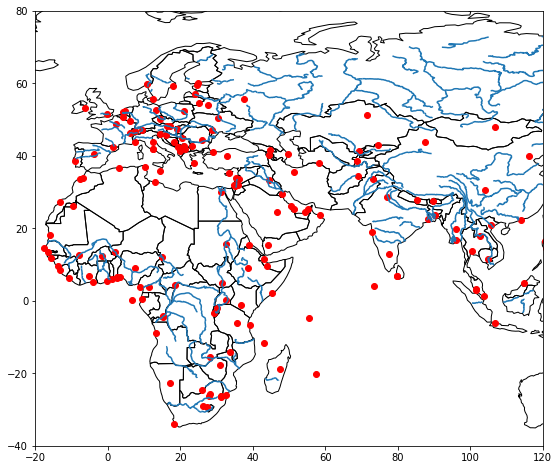

In [68]:
ax = countries.plot(edgecolor = 'k', 
                    facecolor='none', 
                    figsize=(15, 8))
rivers.plot(ax=ax)
cities.plot(ax=ax, color='red')

ax.set(xlim=(-20, 120), ylim=(-40, 80))

plt.show()